In [24]:
import scipy
import numpy as np 
import matplotlib.pyplot as plt 

In [34]:


def chebmat(N, x0, x1):
    '''Chebushev polynomial differentiation matrix.
       Ref.: Trefethen's 'Spectral Methods in MATLAB' book.
    '''
    x      = np.cos(np.pi*np.arange(0,N+1)/N)
    if N%2 == 0:
        x[N//2] = 0.0 # only when N is even!
    c      = np.ones(N+1); c[0] = 2.0; c[N] = 2.0
    c      = c * (-1.0)**np.arange(0,N+1)
    c      = c.reshape(N+1,1)
    X      = np.tile(x.reshape(N+1,1), (1,N+1))
    dX     = X - X.T
    D      = np.dot(c, 1.0/c.T) / (dX+np.eye(N+1))
    D      = D - np.diag( D.sum(axis=1) )
    D     *= -2/(x1-x0)
    return D

def cheby_exgrid(N, x0, x1):
    i=np.linspace(0,N,N+1)
    return (x1-x0)/2.*(-np.cos(i*np.pi/N))+(x0+x1)/2.0

def chebfft(v, x0, x1):
    '''Chebyshev differentiation via fft.
       Ref.: Trefethen's 'Spectral Methods in MATLAB' book.
    '''
    N = len(v)-1
    if N == 0:
        w = 0.0 # only when N is even!
        return w
    x  = np.cos(np.pi*np.arange(0,N+1)/N)
    ii = np.arange(0,N)
    V = np.flipud(v[1:N]); V = list(v) + list(V)
    U = np.real(np.fft.fft(V))
    b = list(ii); b.append(0); b = b + list(np.arange(1-N,0))
    w_hat = 1j*np.array(b)
    w_hat = w_hat * U
    W = np.real(np.fft.ifft(w_hat))
    w = np.zeros(N+1)
    w[1:N] = -W[1:N]/np.sqrt(1-x[1:N]**2)
    w[0] = sum(ii**2*U[ii])/N + 0.5*N*U[N]
    w[N] = sum((-1)**(ii+1)*ii**2*U[ii])/N + \
              0.5*(-1)**(N+1)*N*U[N]
    w *= -2/(x1-x0)
    return w
 

def cheby_poly(x,n):

    T0 = 1.0

    T1 = x

    if n == 0:

        return  T0

    elif n == 1:

        return  T1

    elif n > 1:

        for i in range(n-1):

            T = 2*x*T1-T0 

            T0 = T1

            T1 = T

        return T

def cheby_coeff(x,y,N):

    a = []

    y[0] *= 0.5

    y[N] *= 0.5

    x_chebgrid = cheby_exgrid(N,-1.0,1.0)

    print(x,x_chebgrid)

    for j in range(N+1):

        sum = 2.0 / N  * np.sum(y*cheby_poly(x_chebgrid,j))

        a.append(sum)
    y[0] /= 0.5

    y[N] /= 0.5

    return a

def cheby_interp(x,coeff,N,a,b):

    x_chebgrid = ( 2.0 * x - a  - b ) / ( b-a)

    sum  = coeff[0]*cheby_poly(x_chebgrid,0) * 0.5    

    for j in range(1,N-1):

        sum += coeff[j]*cheby_poly(x_chebgrid,j)

    sum += coeff[N]*cheby_poly(x_chebgrid,N) * 0.5

    return sum


[1.         1.00240764 1.00960736 1.02152983 1.03806023 1.05903937
 1.08426519 1.11349477 1.14644661 1.18280336 1.22221488 1.26430163
 1.30865828 1.35485766 1.40245484 1.45099143 1.5        1.54900857
 1.59754516 1.64514234 1.69134172 1.73569837 1.77778512 1.81719664
 1.85355339 1.88650523 1.91573481 1.94096063 1.96193977 1.97847017
 1.99039264 1.99759236 2.        ] [-1.00000000e+00 -9.95184727e-01 -9.80785280e-01 -9.56940336e-01
 -9.23879533e-01 -8.81921264e-01 -8.31469612e-01 -7.73010453e-01
 -7.07106781e-01 -6.34393284e-01 -5.55570233e-01 -4.71396737e-01
 -3.82683432e-01 -2.90284677e-01 -1.95090322e-01 -9.80171403e-02
 -6.12323400e-17  9.80171403e-02  1.95090322e-01  2.90284677e-01
  3.82683432e-01  4.71396737e-01  5.55570233e-01  6.34393284e-01
  7.07106781e-01  7.73010453e-01  8.31469612e-01  8.81921264e-01
  9.23879533e-01  9.56940336e-01  9.80785280e-01  9.95184727e-01
  1.00000000e+00]


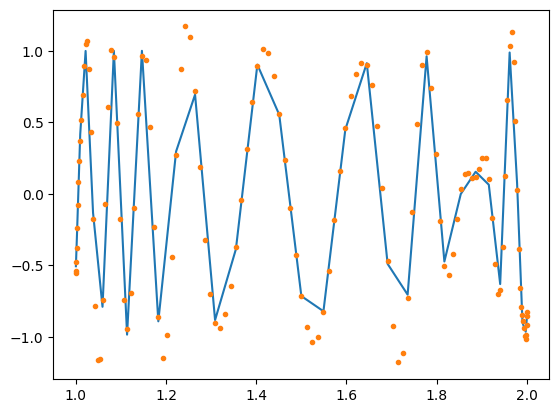

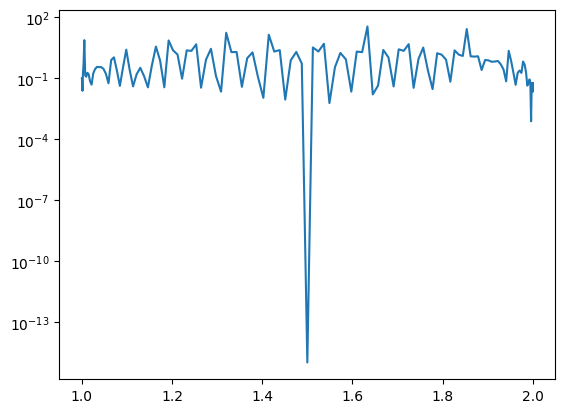

In [41]:
N = 32
a = 1.
b = 2.
k = 100
x = cheby_exgrid(N,a,b)
f = np.sin(k*x)
x2 = cheby_exgrid(N * 4,a,b)
coeff = cheby_coeff(x,f,N)
interp =  cheby_interp(x2,coeff,N,a,b)
plt.plot(x,f,'-',x2,interp,'.')
plt.show()
f2 = np.sin(k* x2) 

plt.yscale("log") 
plt.plot(x2, np.abs((f2 - interp)/f2))
plt.show()



## Matrix differentiation

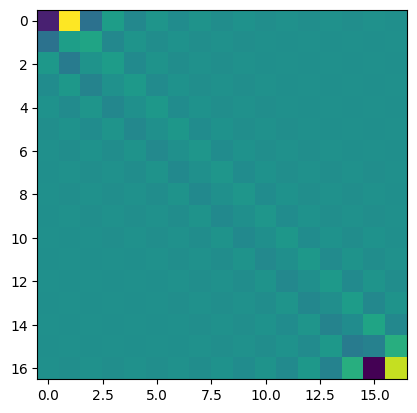

In [17]:
plt.imshow(D)

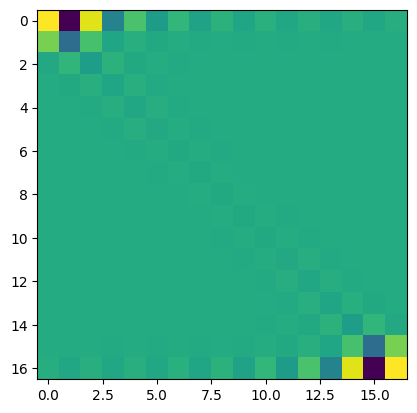

In [18]:
plt.imshow(np.matmul(D, D))

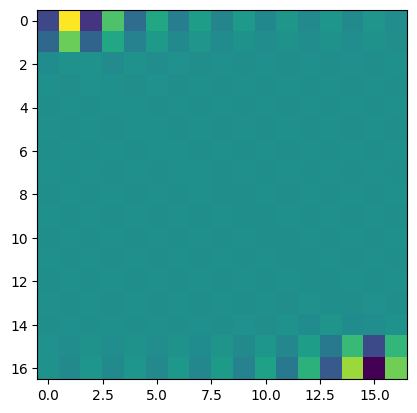

In [23]:
plt.imshow(np.matmul(np.matmul(D, D), D))

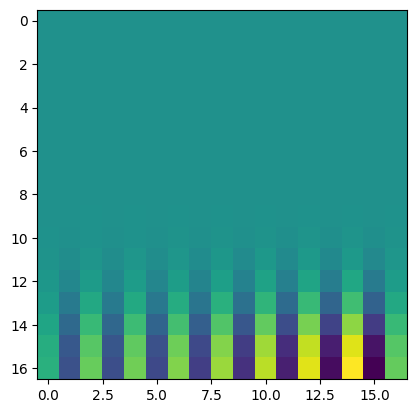

In [22]:
plt.imshow(scipy.linalg.expm(D))

[0.         0.00240764 0.00960736 0.02152983 0.03806023 0.05903937
 0.08426519 0.11349477 0.14644661 0.18280336 0.22221488 0.26430163
 0.30865828 0.35485766 0.40245484 0.45099143 0.5        0.54900857
 0.59754516 0.64514234 0.69134172 0.73569837 0.77778512 0.81719664
 0.85355339 0.88650523 0.91573481 0.94096063 0.96193977 0.97847017
 0.99039264 0.99759236 1.        ]


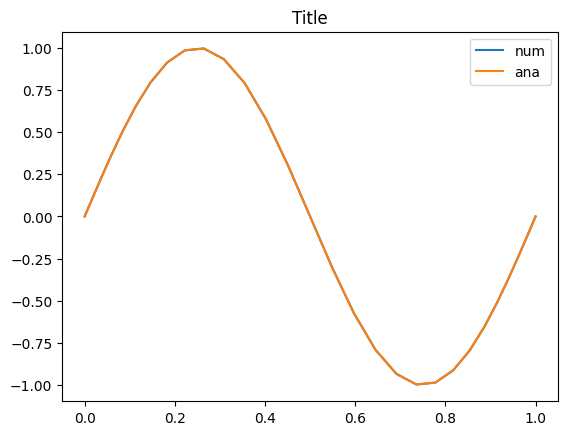

33
8.825357975901586e-07 3.949517141098023e-07 6.651136560529653e-08


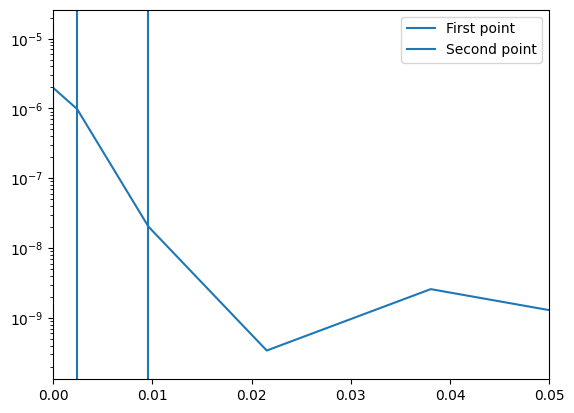

In [33]:
a = 0
b = 1
xx = cheby_exgrid(32, a, b)
D = chebmat(32, a, b)
print(xx)
f  = np.sin(2*np.pi * xx) 
ddfnum = np.matmul(D,np.matmul(D,np.matmul(D,np.matmul(D,f))))
ddfana = np.sin(2*np.pi * xx) * (2*np.pi)**4
plt.title("Title")
#plt.plot(xx, f) 
plt.plot(xx, ddfnum / (2* np.pi)**4, label="num") 
plt.plot(xx, ddfana / (2* np.pi)**4, label="ana") 
plt.legend()
plt.show()
print(len(xx))
plt.yscale("log")
plt.plot(xx, np.abs(ddfnum - ddfana))
plt.axvline(xx[1], label="First point")
plt.axvline(xx[2], label="Second point")
plt.xlim([0, 0.05])
plt.legend() 
print(np.mean(np.abs(ddfnum - ddfana)),np.mean(np.abs(ddfnum - ddfana)[1:-1]), np.mean(np.abs(ddfnum - ddfana)[2:-2]))

## Differentiation using FFT

[3.         3.00154133 3.00615583 3.01381504 3.02447174 3.03806023
 3.05449674 3.07367992 3.0954915  3.11979702 3.14644661 3.17527598
 3.20610737 3.23875072 3.27300475 3.30865828 3.3454915  3.38327732
 3.42178277 3.46077045 3.5        3.53922955 3.57821723 3.61672268
 3.6545085  3.69134172 3.72699525 3.76124928 3.79389263 3.82472402
 3.85355339 3.88020298 3.9045085  3.92632008 3.94550326 3.96193977
 3.97552826 3.98618496 3.99384417 3.99845867 4.        ]


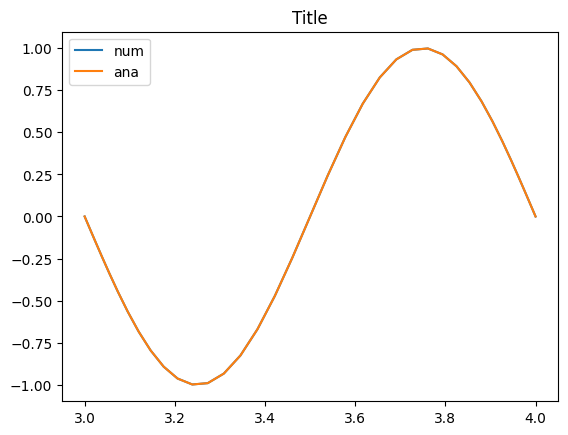

41


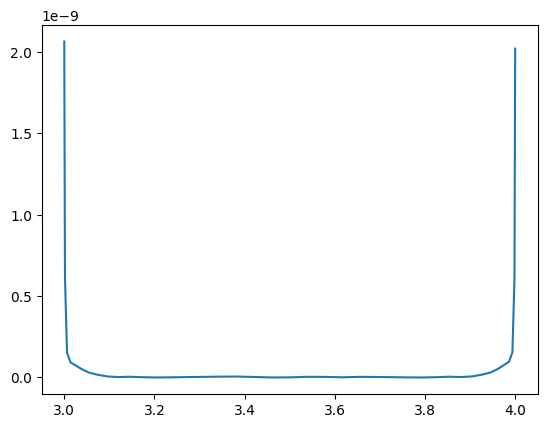

In [3]:

def cheby_poly(x,n):
    T0 = 1.0
    T1 = x
    if n == 0:
        return  T0
    elif n == 1:
        return  T1
    elif n > 1:
        for i in range(n-1):
            T = 2*x*T1-T0 
            T0 = T1
            T1 = T
        return T

def cheby_coeff(x,y,N):
    a = []
    y[0] *= 0.5
    y[N] *= 0.5

    x_chebgrid = cheby_exgrid(N,-1.0,1.0)
    print(x,x_chebgrid)
    for j in range(N+1):
        sum = 2.0 / N  * np.sum(y*cheby_poly(x_chebgrid,j))
        a.append(sum)

    y[0] /= 0.5
    y[N] /= 0.5
    return a

def cheby_interp(x,coeff,N,a,b):

    x_chebgrid = ( 2.0 * x - a  - b ) / ( b-a);
    sum  = coeff[0]*cheby_poly(x_chebgrid,0) * 0.5    
    for j in range(1,N-1):
        sum += coeff[j]*cheby_poly(x_chebgrid,j)
    sum += coeff[N]*cheby_poly(x_chebgrid,N) * 0.5
    return sum

a = 3
b = 4
xx = cheby_exgrid(40, a, b)
print(xx)
f  = np.sin(2*np.pi * xx) 
ddfnum = chebfft(chebfft(f, a, b), a, b)
ddfana = -np.sin(2*np.pi * xx) * (2*np.pi)**2
plt.title("Title")
#plt.plot(xx, f) 
plt.plot(xx, ddfnum / (2* np.pi)**2, label="num") 
plt.plot(xx, ddfana / (2* np.pi)**2, label="ana") 
plt.legend()
plt.show()
print(len(xx))
plt.plot(xx, np.abs(ddfnum - ddfana))

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
from numpy import np.pi,linspace,sin,np.cos,exp,round,np.zeros,np.arange,np.real, np.flipud
from numpy.fft import fft,ifft
from matplotlib.pyplot import figure,subplot,plot,grid,title,axis

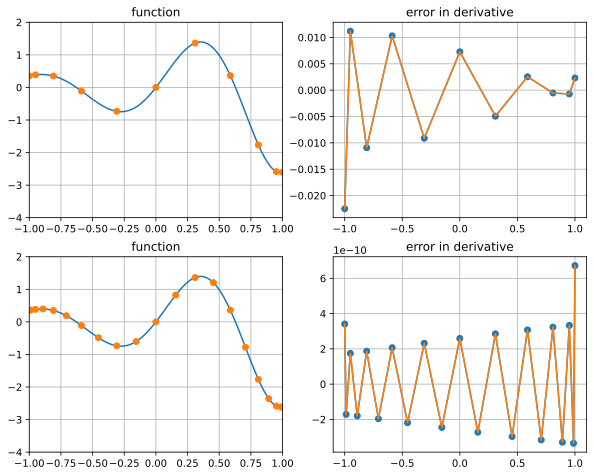

In [3]:
figure(figsize=(10,12))
plot_count = 1

for N in [10,20]:
    xx = linspace(-1.0,1.0,100)
    ff = exp(xx)*sin(5*xx)
    x = np.cos(np.arange(0,N+1)*np.pi/N)
    f = exp(x)*sin(5*x)
    error = chebfft(f) - exp(x)*(sin(5*x)+5*np.cos(5*x))
    subplot(3,2,plot_count)
    plot_count +=1
    plot(xx,ff,'-',x,f,'o')
    grid(True)
    axis([-1, 1, -4,2])
    title('function')
    subplot(3,2,plot_count)
    plot_count +=1
    plot(x,error,'-o')
    title('error in derivative')
    plot(x,error) 
    grid(True)